# Unsupervised Machine Learning Using K-Means Clustering

K-Means clustering is an unsupervised learning technique designed for handling unlabeled data without predefined categories or groups. The primary goal of this algorithm is to cluster similar data points together, with the number of clusters determined by the value of K. Employing an iterative approach, the algorithm assigns each data point to one of the K clusters based on the provided features.


## Importing Libraries Needed to Perform Task

In [251]:
# Import Necessary Libraries

# Data Analysis Libraries
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")


## Loading the Dataset

In [350]:
# Load Data
data = pd.read_csv('/Users/mac/Documents/DATASCIENCE/MACHINE LEARNING/customers.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [351]:
# Rename the 'Genre' column to 'Gender'
data.rename(columns={'Genre': 'Gender'}, inplace=True)

In [352]:
data.head()  # Loads the first five rows

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [353]:
data.tail()  # Loads the last five rows

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [354]:
data.shape # Getting the shape of the dataset

(200, 5)

In [355]:
data.info() # Provides a summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [356]:
data.describe()  # Checking statistical description

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Based on the data description, there is no need for data cleaning. The age distribution appears to be relatively normal, and there are no extreme outliers in annual income, which is measured in thousands. The spending score falls within the range of 1 to 100. Overall, the data appears to be in good condition, requiring no significant data cleaning or outlier handling.

CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

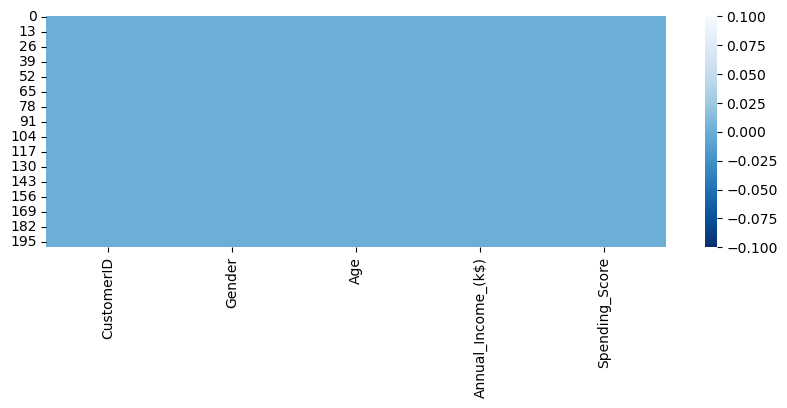

In [357]:
# Check For Missing Values
print(data.isnull().sum())
      
# Visualizing the Missing Data
plt.figure(figsize=(10, 3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r" )

In [358]:
len(data)

200

In [359]:
# Checking for duplicates

print(data.duplicated().sum())

0


## Exploratory Data Analysis

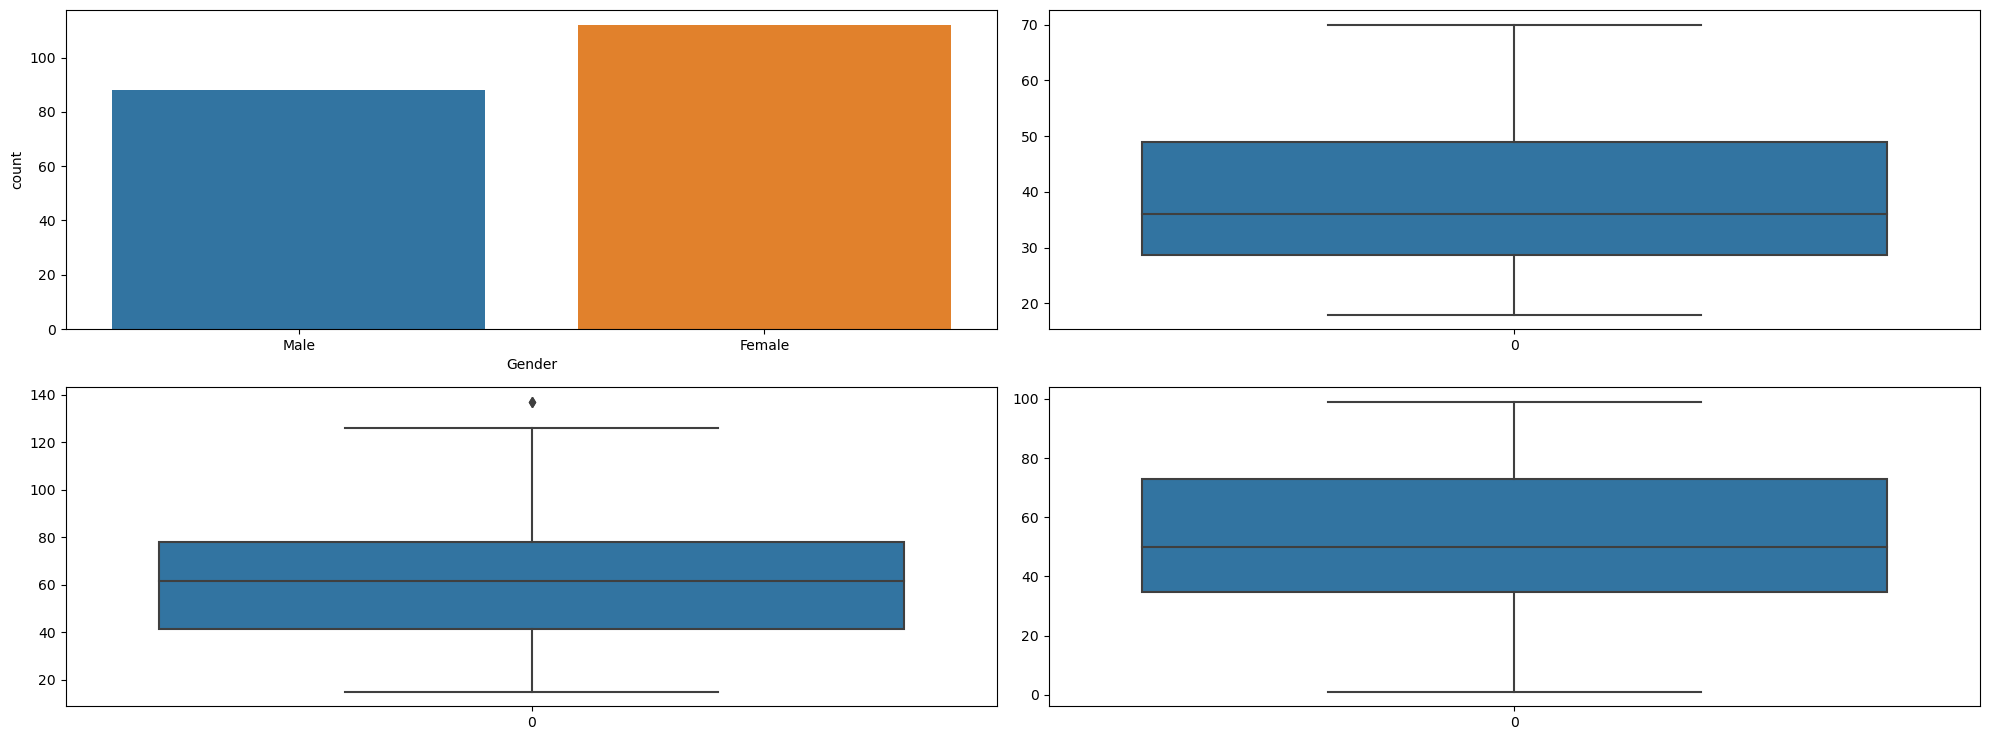

In [361]:
# Exploratory Data Analysis

fig,axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot (x=data['Gender'], ax=axs[0,0])
plt2 = sns.boxplot (data['Age'], ax=axs[0,1])
plt3 = sns.boxplot (data['Annual_Income_(k$)'], ax=axs[1,0])
plt4 = sns.boxplot (data['Spending_Score'], ax=axs[1,1])

plt.tight_layout()

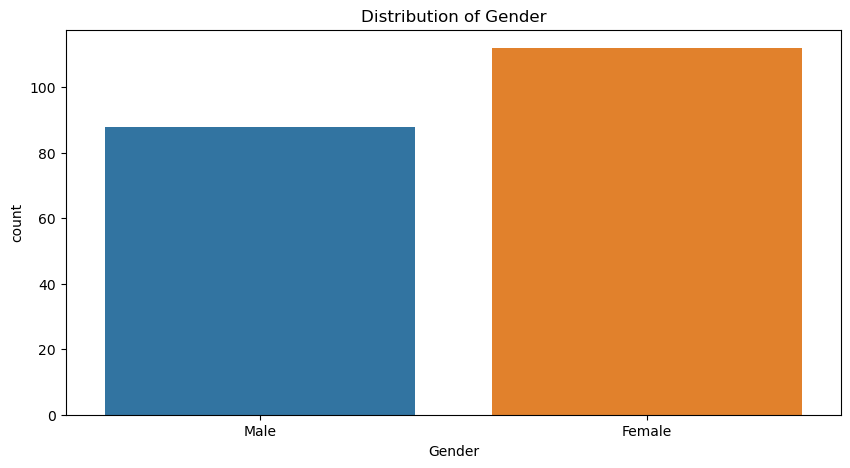

In [362]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=data);
plt.title('Distribution of Gender');

plt.show()

### There are more women than men in this dataset.


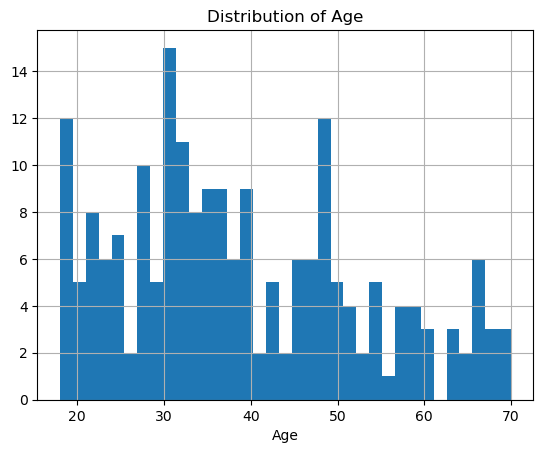

In [423]:
# Histogram of ages
data.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');


### Age histogram is somewhat right-tailed. We saw that the average age was 38 as well, so this is not surprising, with a spike in ages 48-49 and 65 as well.



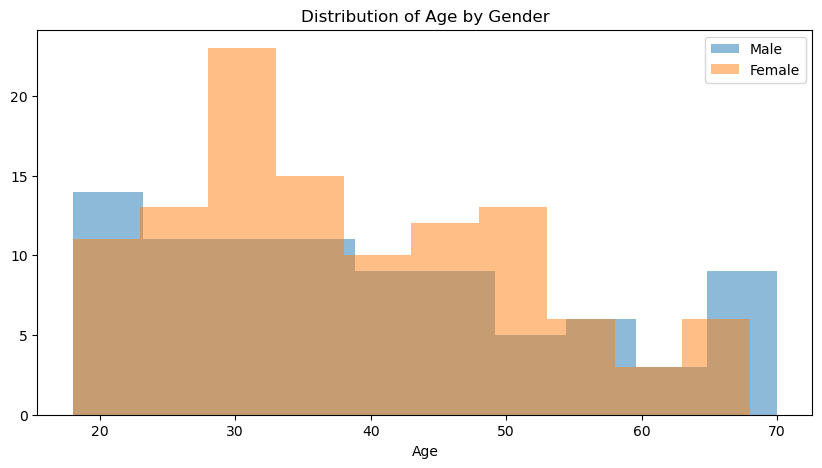

In [366]:
# Histogram of ages by gender
plt.figure(figsize=(10, 5))
plt.hist('Age', data=data[data['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=data[data['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

### Observations from the data are as follows:

We can see two things here, one reflected earlier in the describe call:

1. There are more women than men in this data set.

2. There are a lot of younger women and middle-aged women.


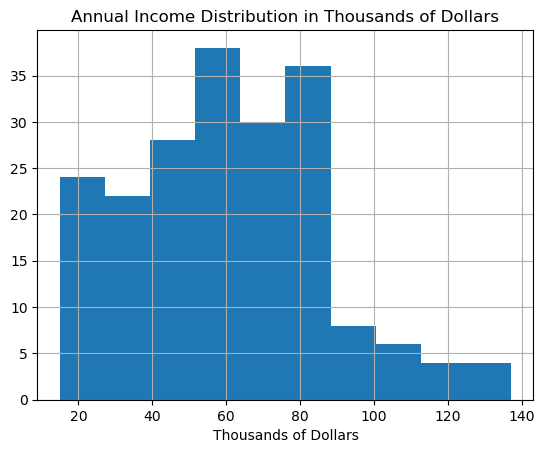

In [344]:
# Histogram of income
data.hist('Annual_Income_(k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

### The most frequent annual incomes are between around 50 and 85,000.

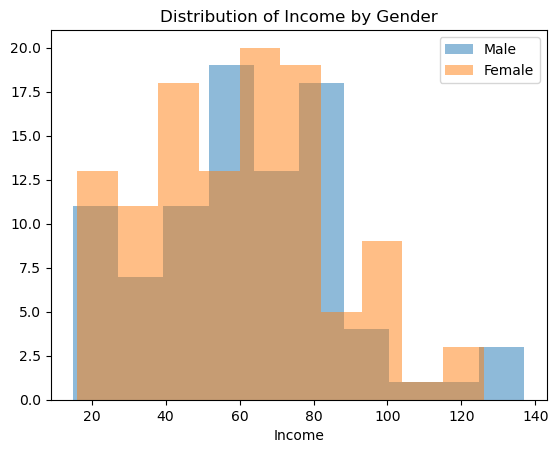

In [384]:
# Histogram of income by gender
plt.hist('Annual_Income_(k$)', data=data[data['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual_Income_(k$)', data=data[data['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income');
plt.legend();


### Women generally had lower incomes than men, with the majority falling between 45,000 and 80,000 dollars.

In [385]:
# Create data sets by gender
male_customers = data[data['Gender'] == 'Male']
female_customers = data[data['Gender'] == 'Female']

In [386]:
# Print the average spending score for men and women
print(male_customers['Spending_Score'].mean())
print(female_customers['Spending_Score'].mean())

48.51136363636363
51.526785714285715


### On average, women had a higher spending score, with approximately 3 points more than men

## Insights from Customer Data Analysis

- There are more female customers than male, indicating a gender imbalance in our customer base.

- When it comes to annual income, we currently have only one offer or pricing tier available. This suggests an opportunity to diversify our pricing options and potentially cater to a broader range of income levels.


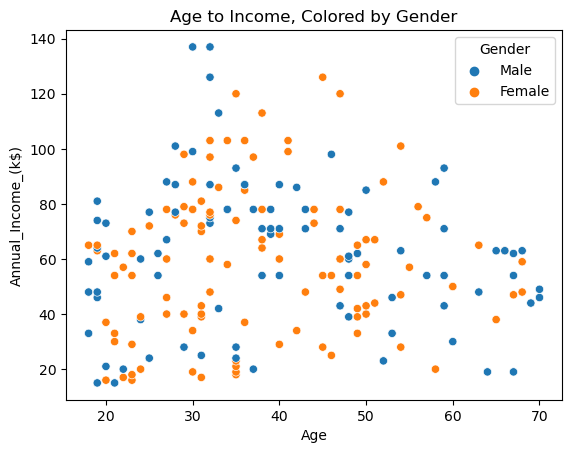

In [397]:
sns.scatterplot(x='Age', y='Annual_Income_(k$)', hue='Gender', data=data)
plt.title('Age to Income, Colored by Gender');


### There is almost no observable correlation between age and income for both men and women in this dataset. This lack of correlation is further supported by the correlation matrix displayed below.

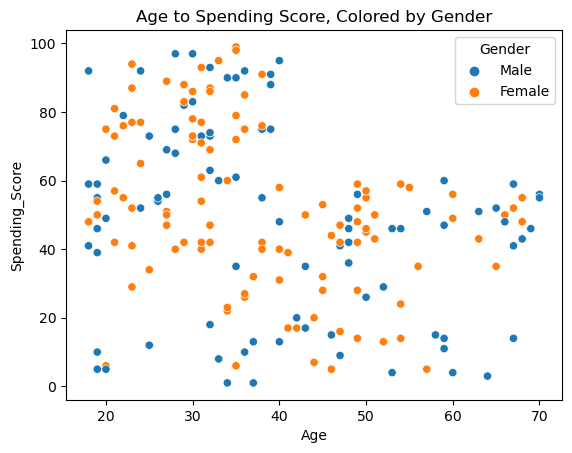

In [396]:
sns.scatterplot(x='Age', y='Spending_Score', hue='Gender', data=data)
plt.title('Age to Spending Score, Colored by Gender');


### The plot above illustrates a negative correlation between age and spending score. While it's not a particularly strong association, it suggests that as individuals grow older, their spending score tends to decrease.




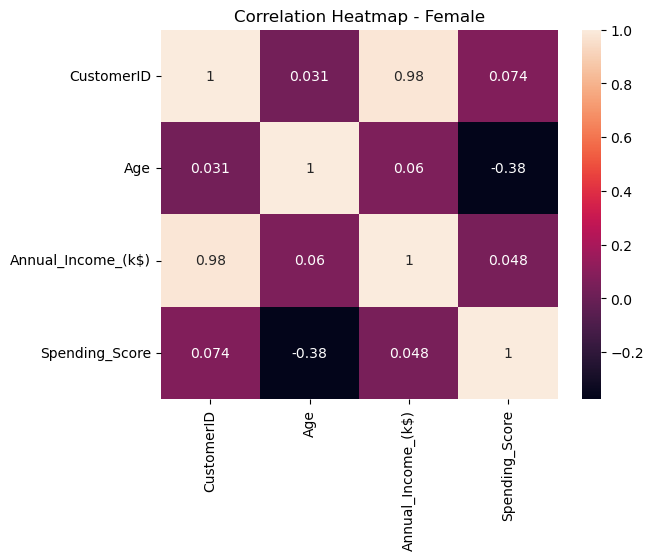

In [398]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

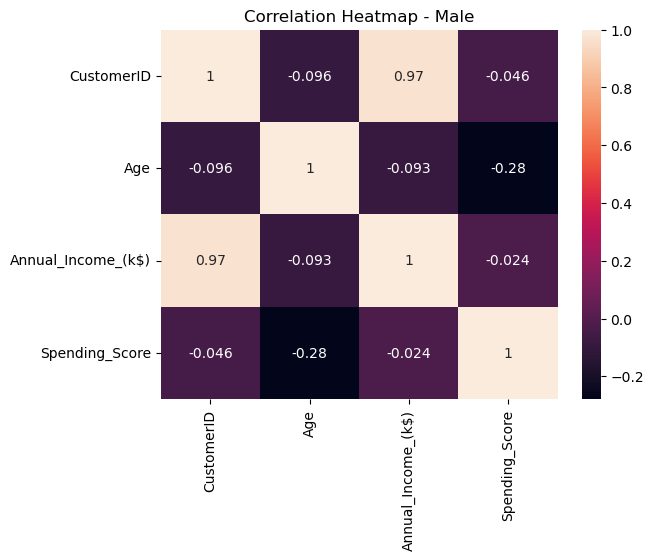

In [399]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Male');

### When comparing men to women, it becomes apparent that women exhibit a slightly stronger correlation between age and spending score.


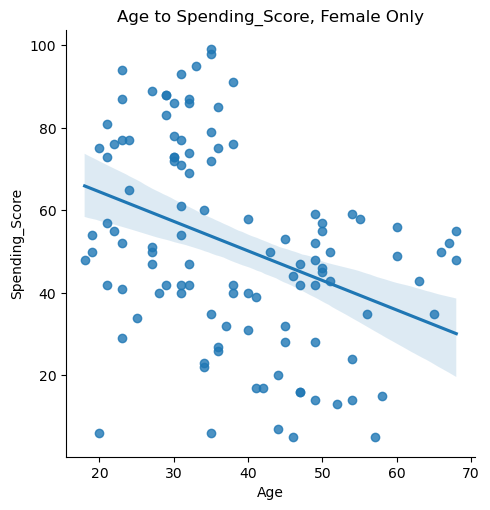

In [405]:
sns.lmplot(x='Age', y='Spending_Score', data=female_customers)
plt.title('Age to Spending_Score, Female Only');


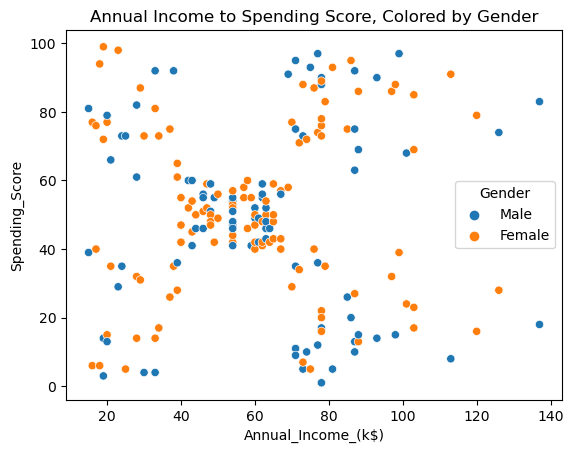

In [417]:
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Gender', data=data)
plt.title('Annual Income to Spending Score, Colored by Gender');

### Annual Income and Spending Score have similar means and standard deviations, which result in the unusual shape of the distribution. However, there is very little to no correlation between these two variables.






In [424]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder()

# Loop through all columns except 'Survived'
for c in data.columns[1:]:
    if (data[c].dtype == 'object'):
         data[c] = encoder.fit_transform(data[c])
    else:
            data[c] = data[c]

data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [425]:
# Remove Customer ID Column

data.drop("CustomerID", axis=1, inplace=True)
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Finding the optimum number of clusters using k-means clustering

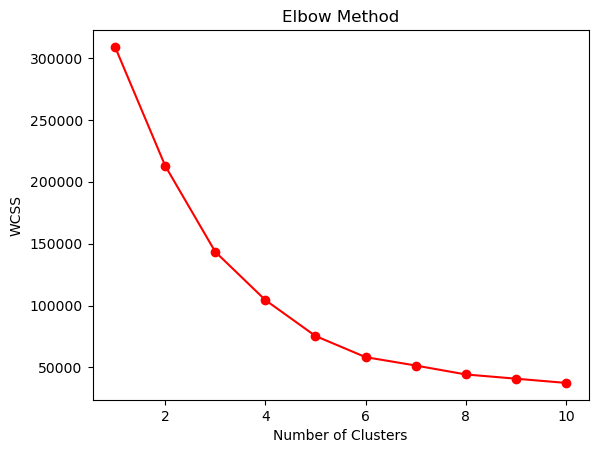

In [426]:
# Determine optimal number of clusters

wcss = [ ]

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color='red', marker='o')    
plt.title('Elbow Method')    
plt.xlabel('Number of Clusters')   
plt.ylabel('WCSS')
plt.show()

## Initializing K-Means With Optimum Number Of Clusters

In [427]:
# Fit K-means Clustering Model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

# Add Cluster labels to Data

data['Cluster']=kmeans.labels_

## Visualizing the Clusters

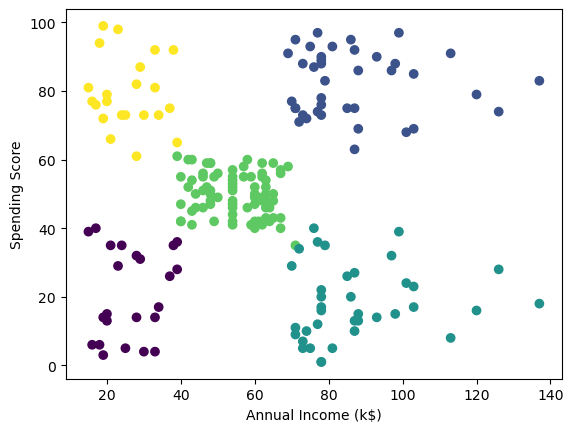

0.44493777835059417

In [428]:
# Visualize cluster results
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

# Calculate silhouette Score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)


## Narrations
1. Low income, low spending score
2. Low income, high spending score
3. Mid income, medium spending score
4. High income, low spending score
5. High income, high spending score

## Conclusion
- The clustering analysis reveals distinct customer segments.
- Businesses can use these insights to tailor marketing strategies and enhance customer satisfaction.
- The Silhouette Score validates the quality of the clustering, with a higher score indicating better separation between clusters.